# Introduction
In this project we have a dataset of houses and we want to predict their prices. The following series of steps describes the entire dataset analysis.

# 1 Importing the libraries
In order to perform data preprocessing using Python, we need to import some predefined Python libraries.

[*numpy*](https://numpy.org/): Is the fundamental package for scientific computing in Python.

[*pandas*](https://pandas.pydata.org/): Is a library to do the mathematical operations in a flexible manner.

[*seaborn*](https://seaborn.pydata.org/index.html): Is a library for data visualization. It provides a high-level interface for drawing attractive and informative statistical graphics.

[*matplotlib*](https://matplotlib.org/): Is a plotting library for creating static, animated, and interactive visualizations in Python. Pyplot is a Matplotlib module which provides a MATLAB-like interface.

[*imputer*](https://sklearn.org/modules/generated/sklearn.preprocessing.Imputer.html): Imputation transformer for completing missing values.

[*missingo*](https://github.com/ResidentMario/missingno): Provides a small toolset of flexible and easy-to-use missing data visualizations

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import sys

from sklearn.impute import SimpleImputer
from pandas import set_option
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from plots import Plots

---
# 2 Importing the dataset
Now we need to import the **dataset** ([link](https://www.dropbox.com/s/zxv6ujxl8kmijfb/cal-housing.csv?dl=0)).

Here is a **description** of the attributes in the dataset.

1. `longitude`: A measure of how far west a house is; a higher value is farther west
2. `latitude`: A measure of how far north a house is; a higher value is farther north
3. `housingMedianAge`: Median age of a house within a block; a lower number is a newer building
4. `totalRooms`: Total number of rooms within a block
5. `totalBedrooms`: Total number of bedrooms within a block
6. `population`: Total number of people residing within a block
7. `households`: Total number of households, a group of people residing within a home unit, for a block
8. `medianIncome`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. `medianHouseValue`: Median house value for households within a block (measured in US Dollars)
10. `oceanProximity`: Location of the house w.r.t ocean/sea

We want to apply the *ridge regression* algorithm in order to predict the label **medianHouseValue** and check how is it good on this dataset.

In [2]:
data_set = pd.read_csv(filepath_or_buffer='cal-housing.csv')

---
# 3 Exploring the dataset
Now let's look inside the imported dataset to understand its content. 

## 3.1 Data visualization
We can use plots to get a visualization of our data. Using **Histograms** we can get idea about the distribution of each attribute in dataset.

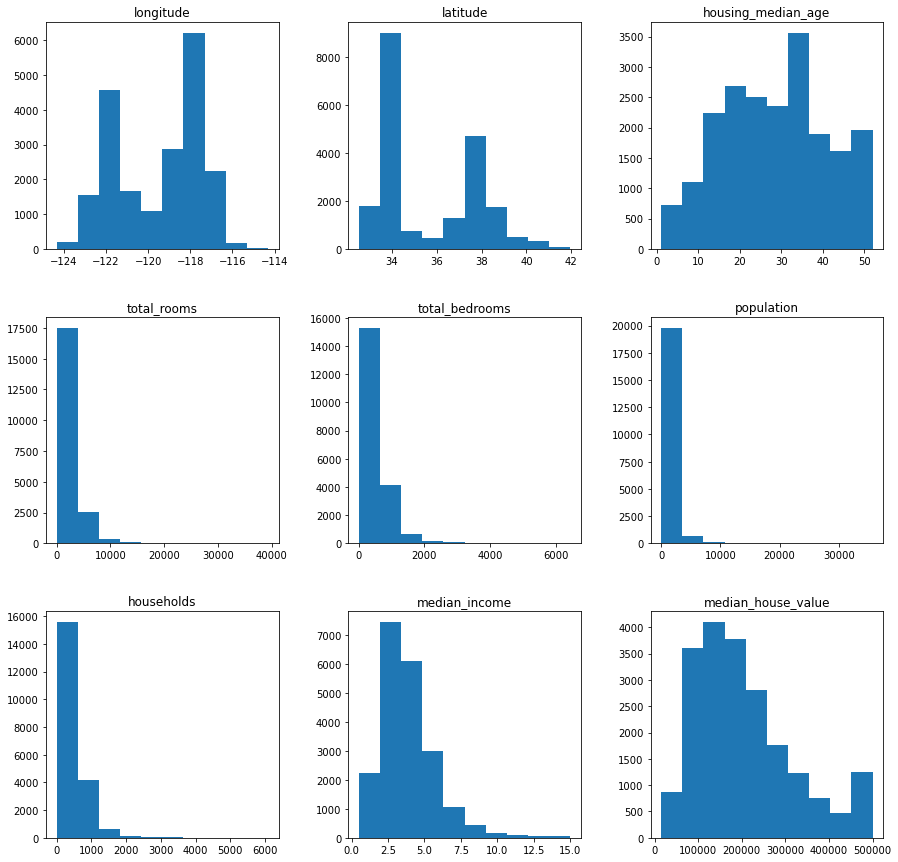

In [3]:
data_set.hist(grid=False ,figsize=[15,15])
plt.show()

We use the [*info()*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info) method of pandas to get informations. We can also note that all the data are `float` type while the last one `ocean_proximity` is an `object` type (it's a categorical data). We'll manage it in the pre-processing phase.

In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**NOTE:** Sometimes .CSV file could have a wrong nan format, unreadable by pandas. As we can read in [pandas guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#string-regular-expression-replacement) we can manage *nan* values. To make sure that the blank spaces are read as *nan* we can use the `replace()` ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html?highlight=replace#pandas.DataFrame.replace)) method:

In [5]:
# replace whitespace 
data_set.replace(" ", np.nan)
# replace whitespace
data_set.replace("", np.nan)
# removes surrounding whitespace (regex -> regex)
data_set.replace(r"\s*\.\s*", np.nan, regex=True)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


As we can see there are **207** `null-values` in `total_bedrooms` feature. This is a really important information because it tell us there are *missing data* to manage. We'll manage them later in the pre-processing phase.

We can use [*describe()*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) method to get descriptive statistics about our dataset.

In [7]:
data_set.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

---
# 4 Data pre-processing (data cleaning and transformation)
Next step we need to make a pre-processing of our dataset before make a statistical analysis.

## 4.1 Encoding Categorical data
A **categorical data** is data which has some categories. Since machine learning model completely works on mathematics and numbers, if our dataset would have a categorical variable, then it may create trouble while building the model. So it is necessary to encode these categorical variables into numbers. The last column is composed by categorical variables, so we need to manage them before go ahead with our analysis.

As we can see above there are 5 categories for the variable _ocean_proximity_.

In [8]:
# Check the number of categories we have in the "ocean_proximity" column
data_set["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Here is the distribution of values:

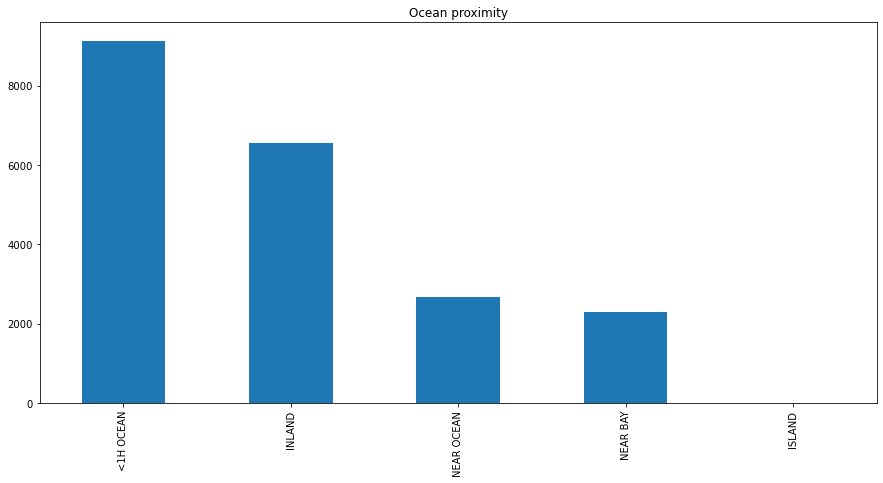

In [9]:
plt.figure(figsize=(15,7))
plt.title("Ocean proximity")
data_set["ocean_proximity"].value_counts().plot(kind="bar")
plt.show()

In [10]:
sb.catplot(x="ocean_proximity", y="median_house_value", data=data_set)

## One-hot Encoding
In our case, there are 5 country variables, and if we had used a `LabelEncoder`, these variables would have been encoded into 0, 1, 2, 3 and 4. By these values, the machine learning model may assume that there is some correlation between these variables which will produce the wrong output. So to avoide this issue, we will use **dummy encoding**. Dummy variables are a way of translating words like `ocean_proximity` names to numbers that the model can understand.

For dummy encoding, we will use **One-hot Encoder** using pandas library [get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html). In our column, we have 5 categories so it will produce 5 columns having 0 and 1 values. Finally we will concat all new columns to our dataset and we'll drop the `ocean_proximity` column.

In [11]:
# Get dummy variables
newDF = pd.get_dummies(data_set["ocean_proximity"], prefix="ocean_proximity")
# Concat 2 DataFrames
# - data_set
# - newDF (DataFrame obtained converting categorical variables into dummy variables)
data_set = pd.concat([data_set, newDF], axis=1)
# Delete "ocean_proximity" column (we don't need it anymore)
data_set.drop(columns="ocean_proximity", inplace=True)

**NOTE:** we could use *scikit learn encoding libraries* to make this operation (like `LabelEncoder()` &rarr; replaced by new library `ColumnTransformer` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)) or `OneHotEncoder()` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder))).

In [12]:
data_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                              0                       0   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   
...                          ...                     ...   
20635                          0                       1   
20636                          0                       1   
20637                          0                       1   
20638                          0                       1   
20639                          0                       1   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                           0                         1   
1                           0                         1   
2                           0                         1   
3                           0                         1   
4                           0                         1   
...                       ...                       ...   
20635                       0                         0   
20636                       0                         0   
20637                       0                         0   
20638                       0                         0   
20639                       0                         0   

       ocean_proximity_NEAR OCEAN  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  
...                           ...  
20635                           0  
20636                           0  
20637                           0  
20638                           0  
20639                           0  

[20640 rows x 14 columns]

## 4.2 Correlation between attributes
The relationship between two variables is called correlation. In statistics, the most common method for calculating correlation is **Pearson’s Correlation Coefficient** that helps us understand the relationships between the *feature values* (*independent values*) and the *target value* (*dependent value* or the value to be predicted) which will further help us in improving our model’s efficiency. Pearson's coefficient is determined by:

$$ r_{i,j} = \frac{\sum_{t=1}^m (x_{i,t}-\mu_i)(x_{j,t}-\mu_j)}{\sqrt{\sum_{t=1}^m (x_{i,t}-\mu_i)^2}\sqrt{\sum_{t=1}^m (x_{j,t}-\mu_j)^2}} $$

In Python, we can easily calculate a correlation matrix of dataset attributes with the help of [`corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html#pandas.DataFrame.corr) function on Pandas *DataFrame*.

In [13]:
corrMatrix = data_set.corr(method='pearson')
plt.figure(figsize=(15,6))
sb.heatmap(corrMatrix, annot=True)
plt.show()

About correlation we need to remember that:

- The value of Correlation will always lie between **1** and **-1**.
- **Correlation=0**, it means there is absolutely *no relationship* between the selected feature value and the target value.
- **Correlation=1**, it means that there is a *perfect relationship* between the selected feature value and the target value and this would mean that the selected feature is appropriate for our model to learn.
- **Correlation=-1**, it means that there exists a *negative relationship* between the selected feature value and the target value, generally, the use of the feature value having a negative value of low magnitude is discouraged for e.g. -0.1 or -0.2.

When there are pairs of correlated features close to −1  or  +1  there is redundancy (like `longitude`, `latitude`, `total_rooms`, `total_bedrooms`, `total_bedrooms`, `households`). To avoid redundancy we could keep only one for each pair.

We check which feature has a correlation larger than  **0.75**  in absolute value with at least some other feature.

In [14]:
corrMatrix[((corrMatrix > 0.75) | (corrMatrix < -0.75)) & (corrMatrix != 1.0)]

longitude  latitude  housing_median_age  \
longitude                         NaN -0.924664                 NaN   
latitude                    -0.924664       NaN                 NaN   
housing_median_age                NaN       NaN                 NaN   
total_rooms                       NaN       NaN                 NaN   
total_bedrooms                    NaN       NaN                 NaN   
population                        NaN       NaN                 NaN   
households                        NaN       NaN                 NaN   
median_income                     NaN       NaN                 NaN   
median_house_value                NaN       NaN                 NaN   
ocean_proximity_<1H OCEAN         NaN       NaN                 NaN   
ocean_proximity_INLAND            NaN       NaN                 NaN   
ocean_proximity_ISLAND            NaN       NaN                 NaN   
ocean_proximity_NEAR BAY          NaN       NaN                 NaN   
ocean_proximity_NEAR OCEAN        NaN       NaN                 NaN   

                            total_rooms  total_bedrooms  population  \
longitude                           NaN             NaN         NaN   
latitude                            NaN             NaN         NaN   
housing_median_age                  NaN             NaN         NaN   
total_rooms                         NaN        0.930380    0.857126   
total_bedrooms                 0.930380             NaN    0.877747   
population                     0.857126        0.877747         NaN   
households                     0.918484        0.979728    0.907222   
median_income                       NaN             NaN         NaN   
median_house_value                  NaN             NaN         NaN   
ocean_proximity_<1H OCEAN           NaN             NaN         NaN   
ocean_proximity_INLAND              NaN             NaN         NaN   
ocean_proximity_ISLAND              NaN             NaN         NaN   
ocean_proximity_NEAR BAY            NaN             NaN         NaN   
ocean_proximity_NEAR OCEAN          NaN             NaN         NaN   

                            households  median_income  median_house_value  \
longitude                          NaN            NaN                 NaN   
latitude                           NaN            NaN                 NaN   
housing_median_age                 NaN            NaN                 NaN   
total_rooms                   0.918484            NaN                 NaN   
total_bedrooms                0.979728            NaN                 NaN   
population                    0.907222            NaN                 NaN   
households                         NaN            NaN                 NaN   
median_income                      NaN            NaN                 NaN   
median_house_value                 NaN            NaN                 NaN   
ocean_proximity_<1H OCEAN          NaN            NaN                 NaN   
ocean_proximity_INLAND             NaN            NaN                 NaN   
ocean_proximity_ISLAND             NaN            NaN                 NaN   
ocean_proximity_NEAR BAY           NaN            NaN                 NaN   
ocean_proximity_NEAR OCEAN         NaN            NaN                 NaN   

                            ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
longitude                                         NaN                     NaN   
latitude                                          NaN                     NaN   
housing_median_age                                NaN                     NaN   
total_rooms                                       NaN                     NaN   
total_bedrooms                                    NaN                     NaN   
population                                        NaN                     NaN   
households                                        NaN                     NaN   
median_income                                     NaN                     NaN   
median_hous

We could drop manually some correlated features and test it but we will manage it through *PCA* later.

## 4.3 Handling Outliers
**Outliers** refer to those data points which lie far away from most of the data points. An outlier may be due to *variability* in the measurement or it may indicate experimental *error*. An outlier can cause serious problems in statistical analyses so we need to manage them.

### Identify outliers (techniques)
Basically there are two main mathematical methods to identify outliers:
- Standard Deviation Method (z-score)
- InterQuartile Range Method

The outliers are generally removed (it depends on how many there are). If we remove to much data we can get bad performance later because we're reducing the dataset size. In this case there are not too much outliers, so we'll try to remove them and check if this action will give us best results.

### Identify outliers with Z-Score

A **z-score** tells us how many standard deviations a given value is from the mean. An observation is an outlier if it has a z-score *less than -3* (**z-scores < -3**) or *greater than 3* (**z-scores > 3**).

![z-score.png](Images/z-score.jpg)

### Identify outliers with InterQuartile
We will use boxplots to read outlier informations. 

A **boxplot** is a method for graphically depicting groups of numerical data through their quartiles. They display the distribution of data based on a five number summary (*“minimum”*, *first quartile (Q1)*, *median*, *third quartile (Q3)*, and *“maximum”*). We can access to these informations using [*info()*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info) method too.

- **InterQuartile Range (IQR)**: 25th to the 75th percentile. IQR tells how spread the middle values are.
- **“minimum”**: Q1 -1.5*IQR
- **first quartile (Q1/25th Percentile)**: the middle number between the smallest number (not the “minimum”) and the median of the dataset.
- **median (Q2/50th Percentile)**: the middle value of the dataset.
- **third quartile (Q3/75th Percentile)**: the middle value between the median and the highest value (not the “maximum”) of the dataset.
- **“maximum”**: Q3 + 1.5*IQR
- **Outliers**: (shown as green circles) In statistics, an outlier is an observation point that is distant from other observations.


![outliers1](Images/Outliers1.png)

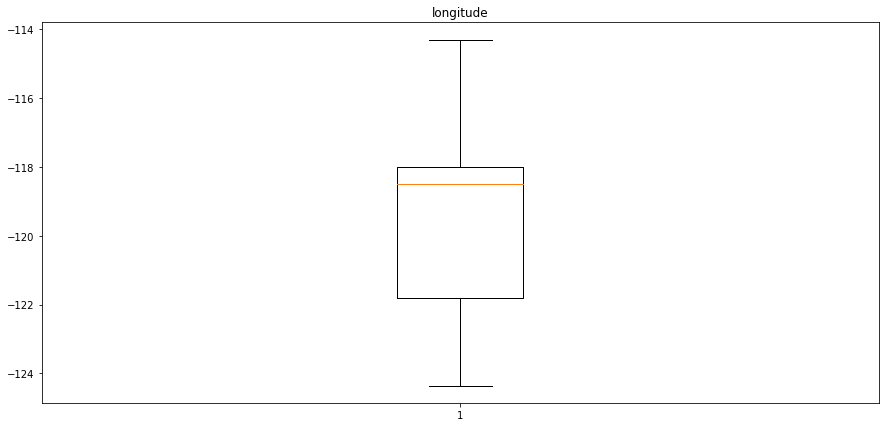

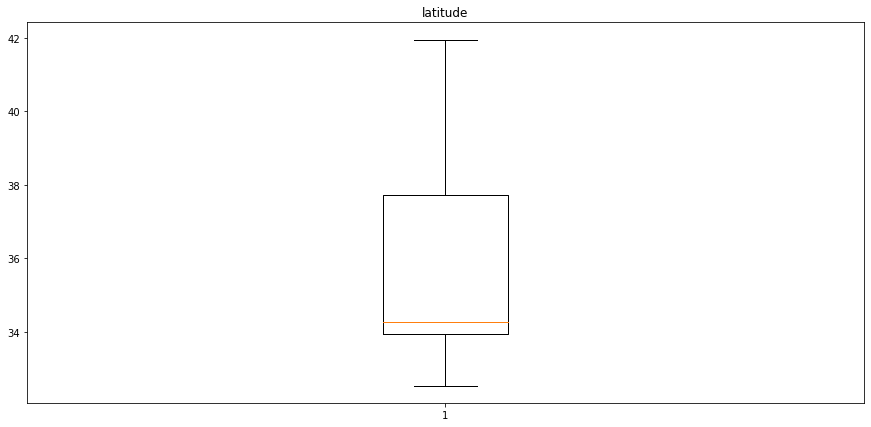

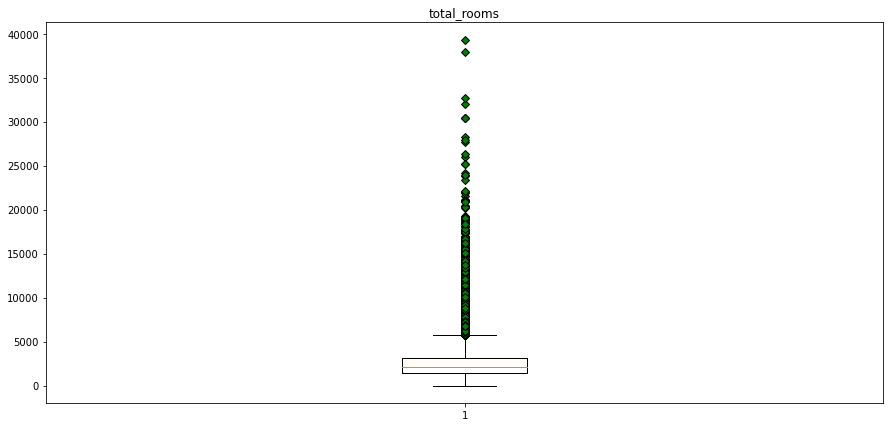

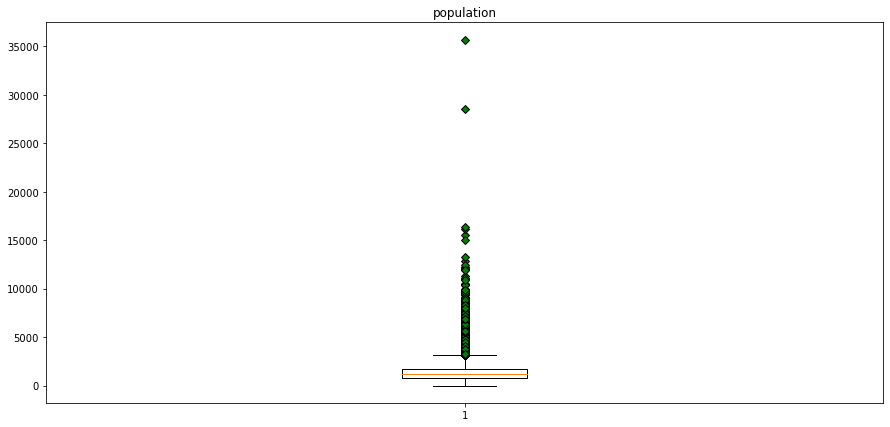

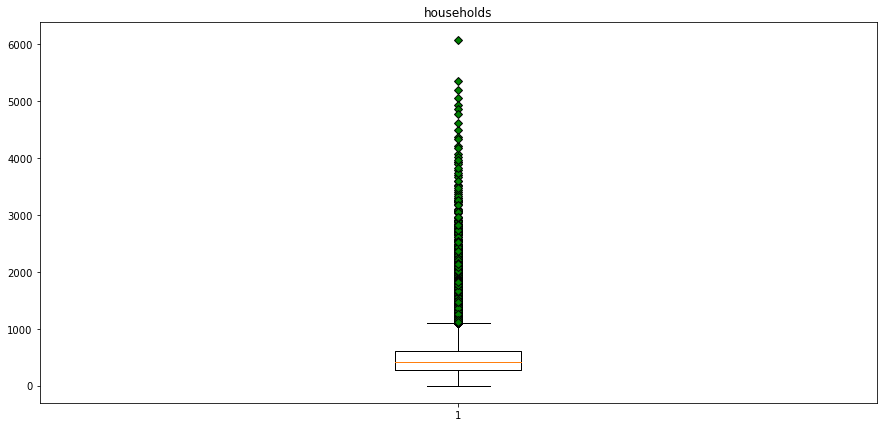

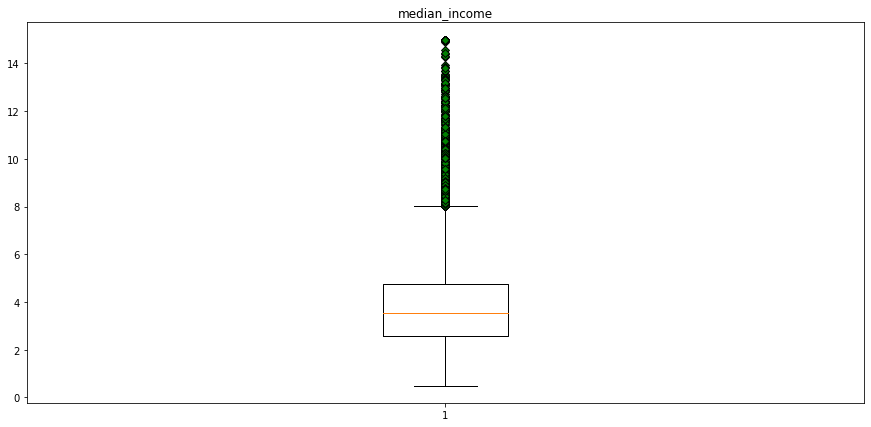

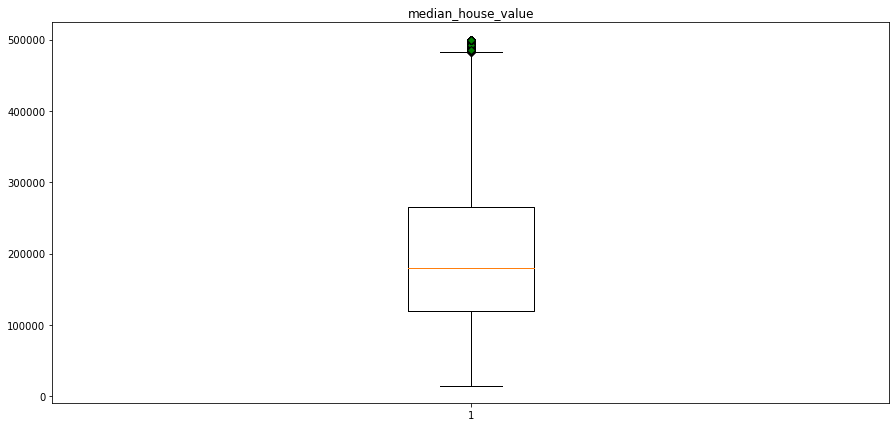

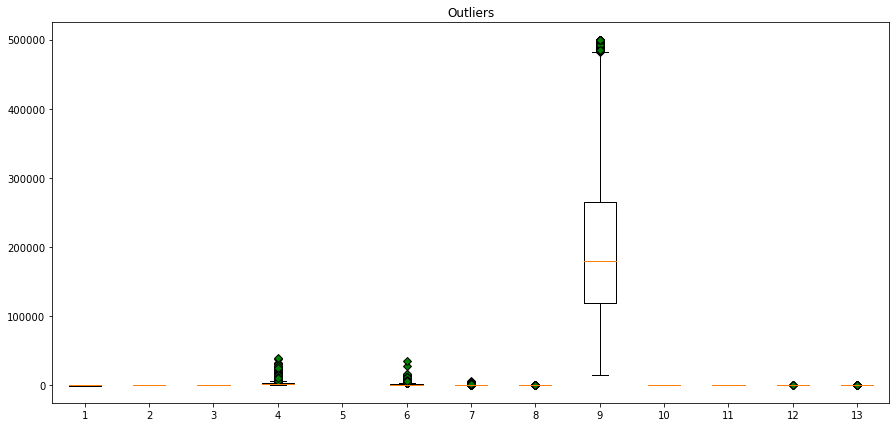

In [15]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                   'total_bedrooms', 'population', 'households', 'median_income',
                   'median_house_value', 'Outliers']

# Plot all outliers
Plots.plotOutliers(data_set, columns)

As we can see there are outliers in `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income` and `median_house_value`. 

Cause we have not handled missing data yet, we will manage this condition first since, as we know, there are missing data in the `total_bedrooms` column. 

So the **steps** will be:
- we will replace these missing data (NaN) with "-1" values (is not possible to have -1 bedrooms in the reality).
- we will handle outliers removing them.
- we will replace -1 values with NaN.

### Visualize missing data distribution

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64


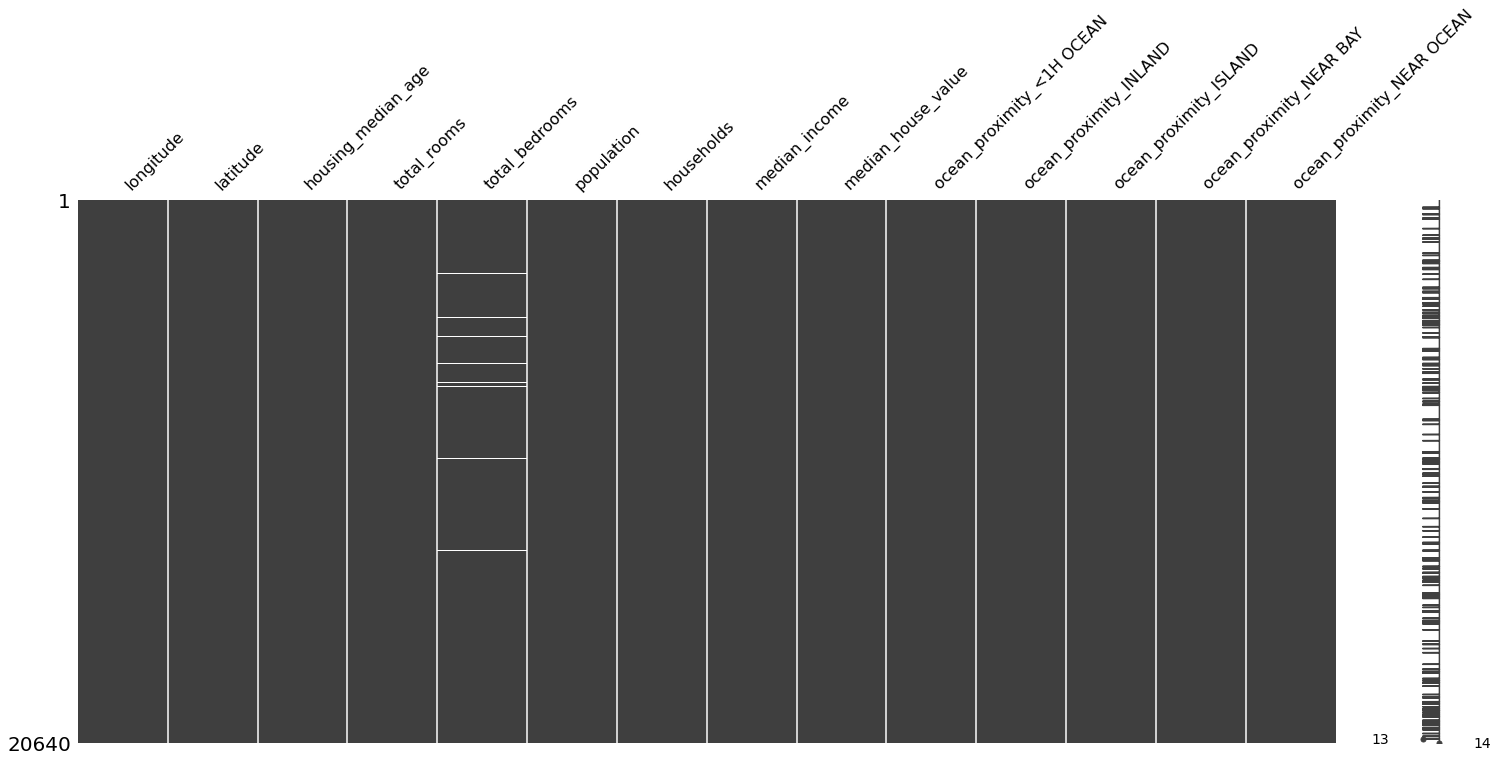

In [16]:
# Resource: https://towardsdatascience.com/working-with-missing-data-in-machine-learning-9c0a430df4ce
msno.matrix(data_set)
# Print isnull values
print(data_set.isnull().sum())

### Replace missing data with -1

Check if there are missing values

In [17]:
# Check if there are missing values
print("Is there NaN values? ", data_set.isnull().values.any())

Is there NaN values?  True


Replace nan with -1

In [18]:
# Control all the columns
for col in data_set.columns:
    # Check if this column has nan values
    if data_set[col].hasnans:
        # Fill nan value with -1 value
        data_set[col].fillna(value = -1, inplace=True)

Check if there are missing values

In [19]:
# Check if there are missing values
print("Is there NaN values? ", data_set.isnull().values.any())
print("\n",data_set.isnull().any())

Is there NaN values?  False

 longitude                     False
latitude                      False
housing_median_age            False
total_rooms                   False
total_bedrooms                False
population                    False
households                    False
median_income                 False
median_house_value            False
ocean_proximity_<1H OCEAN     False
ocean_proximity_INLAND        False
ocean_proximity_ISLAND        False
ocean_proximity_NEAR BAY      False
ocean_proximity_NEAR OCEAN    False
dtype: bool


longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64


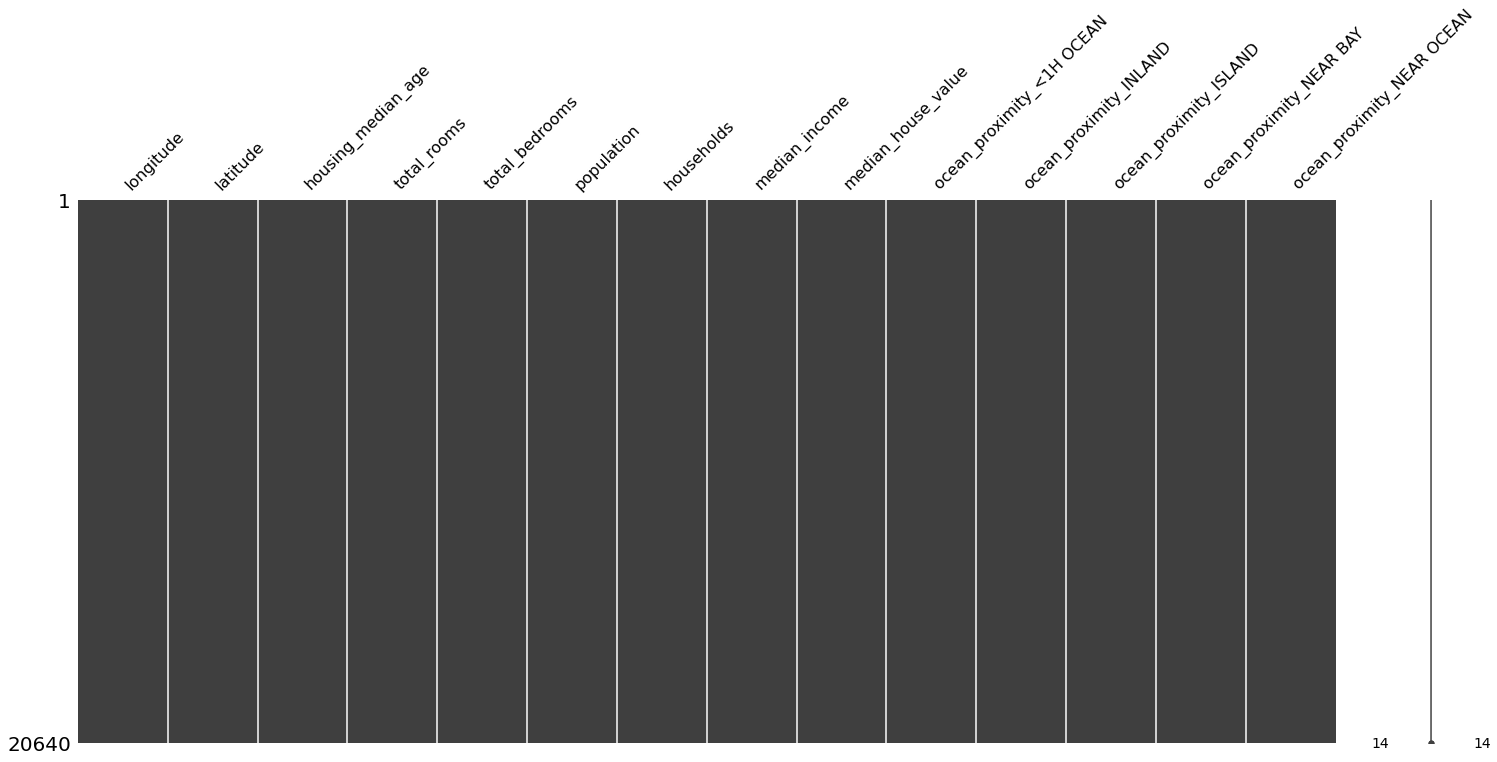

In [20]:
# Resource: https://towardsdatascience.com/working-with-missing-data-in-machine-learning-9c0a430df4ce
msno.matrix(data_set)
# Print isnull values
print(data_set.isnull().sum())

We can use one of the two techniques presented above to remove outliers.

**NOTE:** testing the dataset using Ridge regression (and removing outliers first) gives us best performance than when we keep them. So we will remove them. To do it we will use interquartile technique.

In [21]:
# True = removes outliers from the dataset
removeOutliers = True

# 0 = z-score
# 1 = interquartile
method = 1


if removeOutliers == True:
    
    # Z-SCORE (STANDARDIZATION)
    if method == 0:
        # Get dimension of the dataset
        previousDFSize = data_set.shape

        partToManage = data_set
        
        #col_list = ["total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"].

        # Find absolute value of z-score for each observation
        #z_total_rooms        = np.abs(stats.zscore(partToManage.total_rooms))
        #z_total_bedrooms     = np.abs(stats.zscore(partToManage.total_bedrooms))
        #z_population         = np.abs(stats.zscore(partToManage.population))
        #z_households         = np.abs(stats.zscore(partToManage.households))
        #z_median_income      = np.abs(stats.zscore(partToManage.median_income))
        #z_median_house_value = np.abs(stats.zscore(partToManage.median_house_value))
        
        z = np.abs(stats.zscore(partToManage))
        
        # Only keep rows in dataframe with all z-scores less than absolute value of 3 (no outliers)
        #data_clean = partToManage[(z_total_rooms       <3)]
        #data_clean = partToManage[(z_total_bedrooms    <3)]
        #data_clean = partToManage[(z_population        <3)]
        #data_clean = partToManage[(z_households        <3)]
        #data_clean = partToManage[(z_median_income     <3)]
        #data_clean = partToManage[(z_median_house_value<3)]
        
        data_clean = data_set[(z<=3).all(axis=1)]

        # Get new dimension of the dataset 
        newDFSize = data_clean.shape
        #newDFSize = data_set.shape

        print("previousDFSize = ", previousDFSize, "\nnewDFSize = ", newDFSize)

        # Copy back new DataFrame
        data_set = data_clean
        
    # INTERQUARTILE
    if method == 1:
        # Get "total_rooms" min max quartile
        iqr = data_set["total_rooms"].quantile(0.75) - data_set["total_rooms"].quantile(0.25)
        max_threshold_tot_rooms = data_set["total_rooms"].quantile(0.75) + 1.5*iqr
        min_threshold_tot_rooms = data_set["total_rooms"].quantile(0.75) - 1.5*iqr

        # Get "total_bedrooms" min max quartile
        iqr = data_set["total_bedrooms"].quantile(0.75) - data_set["total_bedrooms"].quantile(0.25)
        max_threshold_tot_bedrooms = data_set["total_bedrooms"].quantile(0.75) + 1.5*iqr
        min_threshold_tot_bedrooms = data_set["total_bedrooms"].quantile(0.25) - 1.5*iqr

        # Get "population" min max quartile
        iqr = data_set["population"].quantile(0.75) - data_set["population"].quantile(0.25)
        max_threshold_population = data_set["population"].quantile(0.75) + 1.5*iqr
        min_threshold_population = data_set["population"].quantile(0.25) - 1.5*iqr

        # Get "households" min max quartile
        iqr = data_set["households"].quantile(0.75) - data_set["households"].quantile(0.25)
        max_threshold_households = data_set["households"].quantile(0.75) + 1.5*iqr
        min_threshold_households = data_set["households"].quantile(0.25) - 1.5*iqr

        # Get "median_income" min max quartile
        iqr = data_set["median_income"].quantile(0.75) - data_set["median_income"].quantile(0.25)
        max_threshold_median_income = data_set["median_income"].quantile(0.75) + 1.5*iqr
        min_threshold_median_income = data_set["median_income"].quantile(0.25) - 1.5*iqr

        # Get "median_house_value" min max quartile
        iqr = data_set["median_house_value"].quantile(0.75) - data_set["median_house_value"].quantile(0.25)
        max_threshold_median_house_value = data_set["median_house_value"].quantile(0.75) + 1.5*iqr
        min_threshold_median_house_value = data_set["median_house_value"].quantile(0.25) - 1.5*iqr

        # Function that removes all raws which contains outliers
        def removeOutliers(data_set, column, min_threshold, max_threshold):
            return data_set[(data_set[column] >= min_threshold) & (data_set[column] <= max_threshold)]

        data_set = removeOutliers(data_set, "total_rooms", min_threshold_tot_rooms, max_threshold_tot_rooms)
        data_set = removeOutliers(data_set, "total_bedrooms", min_threshold_tot_bedrooms, max_threshold_tot_bedrooms)
        data_set = removeOutliers(data_set, "population", min_threshold_population, max_threshold_population)
        data_set = removeOutliers(data_set, "households", min_threshold_households, max_threshold_households)
        data_set = removeOutliers(data_set, "median_income", min_threshold_median_income, max_threshold_median_income)
        data_set = removeOutliers(data_set, "median_house_value", min_threshold_median_house_value, max_threshold_median_house_value)

data_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
5           413.0       193.0         4.0368            269700.0   
6          1094.0       514.0         3.6591            299200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
2                              0                       0   
3                              0                       0   
4                              0                       0   
5                              0                       0   
6                              0                       0   
...                          ...                     ...   
20635                          0                       1   
20636                          0                       1   
20637                          0                       1   
20638                          0                       1   
20639                          0                       1   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
2                           0                         1   
3                           0                         1   
4                           0                         1   
5                           0                         1   
6                           0                         1   
...                       ...                       ...   
20635                       0                         0   
20636                       0                         0   
20637                       0                         0   
20638                       0                         0   
20639                       0                         0   

       ocean_proximity_NEAR OCEAN  
2                               0  
3                               0  
4                               0  
5                               0  
6                               0  
...                           ...  
20635                           0  
20636                           0  
20637                           0  
20638                           0  
20639                           0  

[16711 rows x 14 columns]

As we can see we have removed some outliers data.

### Replace -1 with NaN

In [22]:
counter = 0
# Searching in whole column 
for i in range(len(data_set.total_bedrooms)): 
    if -1 == data_set.total_bedrooms.iloc[i]:
        counter += 1
        
print("Number of -1 values: ", counter)

Number of -1 values:  163


In [23]:
# Replace evey -1 value with -1 in "tota_bedrooms" column
data_set.loc[data_set["total_bedrooms"] == -1.0, "total_bedrooms"] = np.nan

Check if there are still -1 values

In [24]:
counter = 0
# Searching in whole column 
for i in range(len(data_set.total_bedrooms)): 
    if -1 == data_set.total_bedrooms.iloc[i]:
        counter += 1
        
print("Number of -1 values: ", counter)

Number of -1 values:  0


In [25]:
# Check if there are missing values
print("Is there NaN values? ", data_set.isnull().values.any())
print("\n", data_set.isnull().any())              

Is there NaN values?  True

 longitude                     False
latitude                      False
housing_median_age            False
total_rooms                   False
total_bedrooms                 True
population                    False
households                    False
median_income                 False
median_house_value            False
ocean_proximity_<1H OCEAN     False
ocean_proximity_INLAND        False
ocean_proximity_ISLAND        False
ocean_proximity_NEAR BAY      False
ocean_proximity_NEAR OCEAN    False
dtype: bool


longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                163
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64


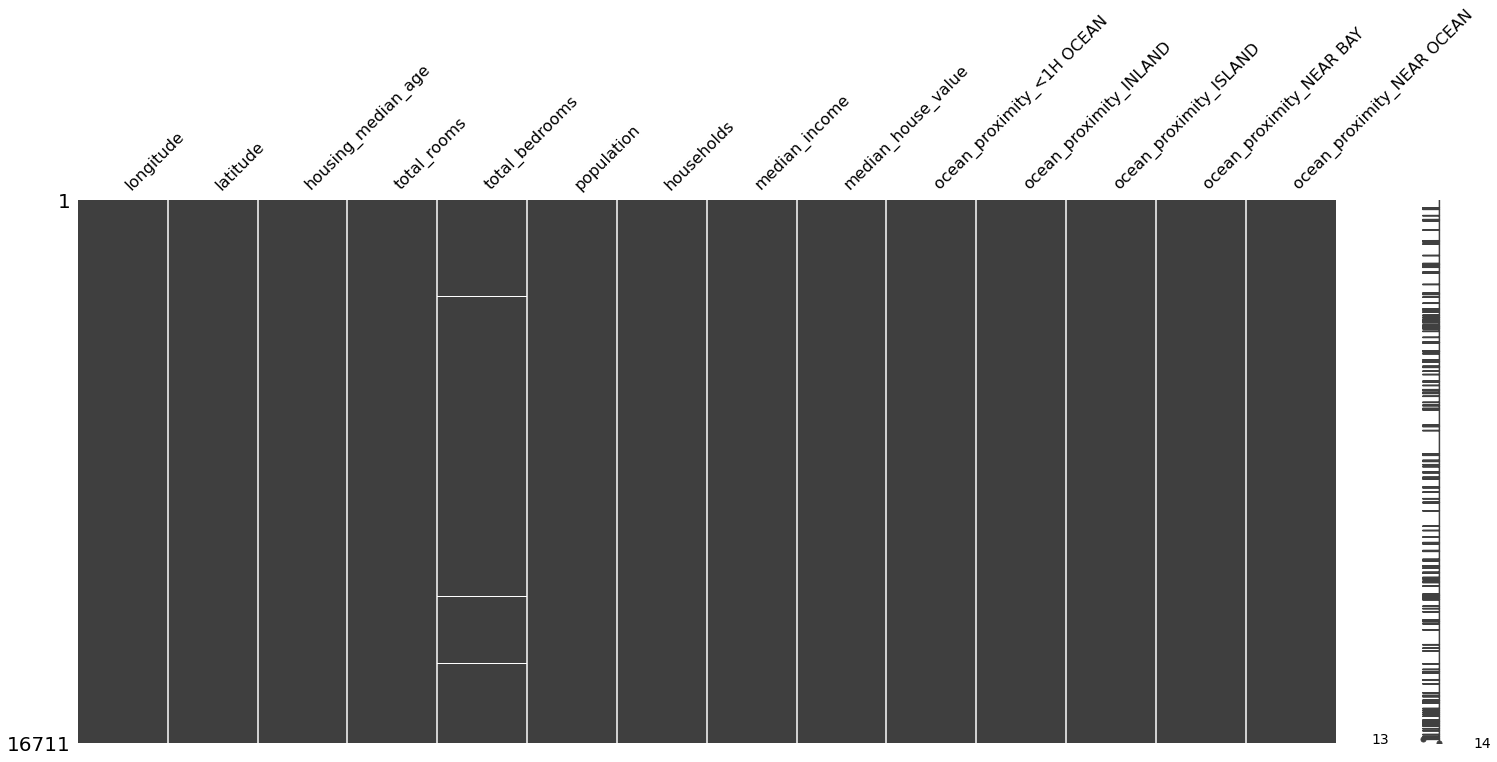

In [26]:
# Resource: https://towardsdatascience.com/working-with-missing-data-in-machine-learning-9c0a430df4ce
msno.matrix(data_set)
# Print isnull values
print(data_set.isnull().sum())

In [27]:
data_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
5           413.0       193.0         4.0368            269700.0   
6          1094.0       514.0         3.6591            299200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
2                              0                       0   
3                              0                       0   
4                              0                       0   
5                              0                       0   
6                              0                       0   
...                          ...                     ...   
20635                          0                       1   
20636                          0                       1   
20637                          0                       1   
20638                          0                       1   
20639                          0                       1   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
2                           0                         1   
3                           0                         1   
4                           0                         1   
5                           0                         1   
6                           0                         1   
...                       ...                       ...   
20635                       0                         0   
20636                       0                         0   
20637                       0                         0   
20638                       0                         0   
20639                       0                         0   

       ocean_proximity_NEAR OCEAN  
2                               0  
3                               0  
4                               0  
5                               0  
6                               0  
...                           ...  
20635                           0  
20636                           0  
20637                           0  
20638                           0  
20639                           0  

[16711 rows x 14 columns]

## 4.4 Handling Missing data
Now we're going to handle missing data in the dataset. 

The general approaches to handle missing data are:
1. *Remove* rows with missing data
2. *Imputation* of data
    - Imputation with *mean*: Missing data is replaced by mean of the column.
    - Imputation with *median*: Missing data is replaced by median of the column.
    - Imputation with *mode*: Missing data is replaced with mode of the column .
    - Imputation with *linear regression*: With real valued data, this is a common technique. The missing value is replaced by performing linear regression based on the other feature values.

The `nan` values are a really small part of our dataset. We'll check results by both **removing** and handling them through **Imputation with mean**,  that is by calculating the mean by using [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html?highlight=mean#pandas.DataFrame.mean) and replacing it by using [fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna).

The following is an example of *nan* value:

In [28]:
data_set[data_set.isnull().any(axis=1)]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
738      -122.14     37.67                37.0       3342.0             NaN   
...          ...       ...                 ...          ...             ...   
20125    -118.80     34.41                45.0       1610.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  median_house_value  \
290         570.0       218.0         4.3750            161900.0   
341         732.0       259.0         1.6196             85100.0   
563         384.0       146.0         4.9489            247100.0   
696         387.0       161.0         3.9063            178400.0   
738        1635.0       557.0         4.7933            186900.0   
...           ...         ...            ...                 ...   
20125      1148.0       347.0         2.7000            120400.0   
20268      1938.0       762.0         1.6953            167400.0   
20372      1701.0       669.0         5.1033            410700.0   
20460      2734.0       814.0         6.6073            258100.0   
20484      1705.0       495.0         5.7376            218600.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
290                            0                       0   
341                            0                       0   
563                            0                       0   
696                            0                       0   
738                            0                       0   
...                          ...                     ...   
20125                          1                       0   
20268                          0                       0   
20372                          1                       0   
20460                          1                       0   
20484                          1                       0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
290                         0                         1   
341                         0                         1   
563                         0                         1   
696                         0                         1   
738                         0                         1   
...                       ...                       ...   
20125                       0                         0   
20268                       0                         0   
20372                       0                         0   
20460                       0                         0   
20484                       0                         0   

       ocean_proximity_NEAR OCEAN  
290                             0  
341                             0  
563                             0  
696                             0  
738                             0  
...                           ...  
20125                           0  
20268                           1  
20372                           0  
20460                           0  
20484                           0  

[163 rows x 14 columns]

Let's work on the missing values:

In [29]:
# 0 = Remove
# 1 = Replace with mean

operation = 1

# Reduced dataset (removing data)
if operation == 0:
    data_set = data_set[-data_set.isnull().any(axis=1)]

# Replaced dataset (replacing with mean value)
if operation == 1:
    # Control all the columns
    for col in data_set.columns:
        # Check if this column has nan values
        if data_set[col].hasnans:
            # Create mean from this column
            mean = data_set[col].mean()
            # Fill nan value with mean value
            data_set[col].fillna(value = mean, inplace=True)

**NOTE:** Alternative method is to use sklearn [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html). We can choose the strategy (mean, median, mode, linear regression) as follow:

In [30]:
# Define SimpleImputer with 'mean' strategy that works on 'nan' values
#simpleImputerMean = SimpleImputer(missing_values=np.nan, strategy='mean')
# Fitting imputer object to the independent variables x excluding last column.
#simpleImputerMean.fit(x[:,:-1])
# Apply transform and replace the original 
#x[:,:-1] = simpleImputerMean.transform(x[:,:-1])

All the *nan* value has been replaced with a *mean* value of their column.

We can check the presence of missing values by using [isnull()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) method:

In [31]:
# Check if there are missing values
print("Is there NaN values? ", data_set.isnull().values.any())
print("\n",data_set.isnull().any())    

Is there NaN values?  False

 longitude                     False
latitude                      False
housing_median_age            False
total_rooms                   False
total_bedrooms                False
population                    False
households                    False
median_income                 False
median_house_value            False
ocean_proximity_<1H OCEAN     False
ocean_proximity_INLAND        False
ocean_proximity_ISLAND        False
ocean_proximity_NEAR BAY      False
ocean_proximity_NEAR OCEAN    False
dtype: bool


We can check the presence of missing values in the following way too:

In [32]:
data_set[data_set.isnull().any(axis=1)]

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity_<1H OCEAN, ocean_proximity_INLAND, ocean_proximity_ISLAND, ocean_proximity_NEAR BAY, ocean_proximity_NEAR OCEAN]
Index: []

In [33]:
data_set[data_set.eq(-1).any(1)]

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity_<1H OCEAN, ocean_proximity_INLAND, ocean_proximity_ISLAND, ocean_proximity_NEAR BAY, ocean_proximity_NEAR OCEAN]
Index: []

## 4.5 Handling duplicate data
To check if there are duplicates into our dataset we can do the following steps:

In [34]:
len(data_set)

16711

In [35]:
data_set = data_set.drop_duplicates()
len(data_set)

16711

As we can see this dataset has no duplicates

## 4.6 Data trasformation

### 4.6.1 Feature Scaling
Looking at our dataset we can see that our attributes have varying scale. But we cannot provide such data to ML algorithm otherwise we might have some dominant variables over others. We're going to use a Regression algorithm where we need to make distance calculations between data, so we need to apply [**Feature scaling**](https://en.wikipedia.org/wiki/Feature_scaling). 

The *feature scaling* is a method used to normalize the *range* of independent variables or features of data.

The main methods to performe it are:
- Rescaling (*min-max*)
- Standardization (*z-score*)
- Normalization (*Euclidean norm L2*)

Making tests on all three types, finally we will use normalization since it gives us best results.

### Min-max
The general formula is:
$$ x' = \frac{x - min(x)}{max(x) - min(x)} $$

### Z-score
The general formula is:
$$ x' = \frac{x - \overline{x}}{\sigma} $$

### Scaling to unit length (L2 norm)
The general formula is:

$$ x' = \frac{x}{\| x\| } $$ 

where 

$$ \| x\| = \sqrt{x * x} $$

We choose to apply standardization (z-score) since it gives us best results. Its application is done in the following lines.

### 4.2.5 Extract dependent and independent variables
We need to distinguish *independent variables* (the matrix of features (predictors), **x**) and *dependent variables* (our target, **y**) from dataset. 

In our case the *dependent variable* is `medianHouseValue` while the others are our *independent variables*.

In [36]:
# get independet variables (we take all the columns except the 'median_house_value' column)
X = data_set.iloc[:,data_set.columns != 'median_house_value']

# get dependent variable (we take the 'median_house_value' column)
y = data_set["median_house_value"]

### Apply Standardization
Now we apply z-score on the data points of specific X features, without considering categorical data converted with One-Hot Encoding, because standardizing the One-Hot encoded features would mean assigning a distribution to categorical features and we don’t want to do that. Furthermore we don't standardize y labels, obviously.

In [37]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_stand = X.copy()

# numerical features
num_cols = ['longitude','latitude','housing_median_age',
            'total_rooms', 'total_bedrooms', 'population', 
            'households', 'median_income']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_stand[[i]])
    
    # transform the training data column
    X_stand[i] = scale.transform(X_stand[[i]])
    
X = X_stand



## copy of datasets
#x_train_stand = x_train.copy()
#x_test_stand = x_test.copy()
#
## numerical features
#num_cols = ['longitude','latitude','housing_median_age',
#            'total_rooms', 'total_bedrooms', 'population', 
#            'households', 'median_income']
#
## apply standardization on numerical features
#for i in num_cols:
#    
#    # fit on training data column
#    scale = StandardScaler().fit(x_train_stand[[i]])
#    
#    # transform the training data column
#    x_train_stand[i] = scale.transform(x_train_stand[[i]])
#    
#    # transform the testing data column
#    x_test_stand[i] = scale.transform(x_test_stand[[i]])
#    
#x_train = x_train_stand
#x_test = x_test_stand

### 4.2.6 Splitting the Dataset into the Training set e Test set
We split our dataset using the rule 80/20.

![training-test-set](Images/training_test_set.png)

We use always the same `random_state` value to get realistic results from now on

In [38]:
# How to use random_state
# Reference: https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn

# take 80% of training set and 20% of test set
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=540)

print('Train size:', x_train.shape[0])
print('Test size:', x_test.shape[0])

Train size: 13368
Test size: 3343


---
# 5 Data analysis and modeling
Ones we have cleaned and transformed our data we can proceed with the application of our *Ridge Regression* algorithm.

## 5.1 Ridge regression
**Ridge regression** is a method of estimating the coefficients of multiple-regression models in scenarios where independent variables are highly corelated. We will use close form solution (*Cholesky*) as implementation.

**NOTE:** For the Ridge regression implementation was used [project template](https://github.com/scikit-learn-contrib/project-template/) of sci-kit learn.

### Import libraries

In [39]:
from sklearn.model_selection import cross_val_predict, cross_val_score, validation_curve, GridSearchCV, learning_curve, KFold
from sklearn.metrics import mean_squared_error, r2_score
from ridgeRegressionEstimator import RidgeRegressionEstimator

### Apply ridge and check goodness of the model (MSE & R-Square)
We're using *alpha=0.000033* because it results the best alpha parameter (check results below)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

# Define the model/ estimator
regressor = RidgeRegressionEstimator(alpha=0.000033)
# Model training
regressor.fit(x_train, y_train)

RidgeRegressionEstimator(alpha=3.3e-05)

In [41]:
# ----------------------------------------------------------------
# Check the goodness of the model - Error -> R^2 & MSE (Evaluating the quality of a model’s predictions)
# ----------------------------------------------------------------

# Prediction of Test and Training set result
y_train_pred = regressor.predict(x_train)
y_test_pred = regressor.predict(x_test)

# Calculating Mean Square Error (MSE)
mse_train = np.mean((y_train_pred - y_train)**2)
mse_test = np.mean((y_test_pred - y_test)**2)

# Calculating R^2
R2_train = regressor.score(x_train, y_train)
R2_test = regressor.score(x_test, y_test)

print("---- Model evaluation: Mean Square Error & R-Square ----\n")
print("MSE train: ",np.round(mse_train, decimals=3))
print("MSE test: ",np.round(mse_test, decimals=3))
print("R2 Train Score: ",np.round(R2_train, decimals=3))
print("R2 Test Score: ",np.round(R2_test, decimals=3))

# NOTE: we can use Scikit method too. They give us the same result.
# print("\n\n---- Model evaluation: Mean Square Error & R-Square (SCIKIT) ----\n")
# # Scikit - Mean Squared Error
# # https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
# print("MSE train: ",np.round(mean_squared_error(y_train, y_train_pred), decimals=3))
# print("MSE test: ",np.round(mean_squared_error(y_test, y_test_pred), decimals=3))
# # Scikit - R-Squared
# # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
# print("R2 Train Score: ",np.round(r2_score(y_train, y_train_pred), decimals=3))
# print("R2 Test Score: ",np.round(r2_score(y_test, y_test_pred), decimals=3))

---- Model evaluation: Mean Square Error & R-Square ----

MSE train:  3165958095.214
MSE test:  3079509705.129
R2 Train Score:  0.64
R2 Test Score:  0.649


### Show all labels predicted using CV
As we can see the line fits pretty well the data.

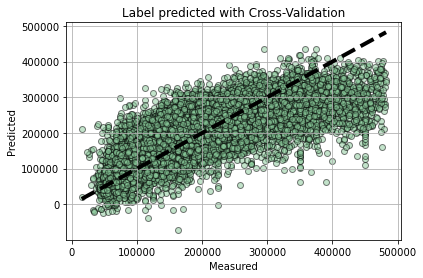

In [42]:
# ----------------------------------------------------------------
# Plot Cross-validated (CV) predictions (labels)
# ----------------------------------------------------------------
# Generate cross-validated estimates for each input data point
y_predicted = cross_val_predict(regressor, X, y, cv=6, n_jobs=-1)

# Show result with a plot
Plots.plotPredictions(y, y_predicted)

### 5.1.1 Tuning alpha hyperparameter

Let's define alphas interval and w (coefficients/weights) of ridge regressor

In [43]:
# ----------------------------------------------------------------
# Hyperparameter optimization (tuning hyperparameters)
#
# References: 
# - https://scikit-learn.org/stable/modules/grid_search.html#grid-search
#
# Why logarithmic scale for hyper-parameter optimization?
# https://stats.stackexchange.com/questions/259815/why-logarithmic-scale-for-hyper-parameter-optimization
#
# Logarithmic Scale in Data Science: How to Plot and Actually Understand It
# https://towardsdatascience.com/logarithmic-scale-how-to-plot-and-actually-understand-it-c38f00212206
# ----------------------------------------------------------------

# Define alpha parameters interval to evaluate
alphas = np.sort(np.logspace(-5, 0, 20))    # NOTE: Nested CV requires a lot of time with high values (> 20 alphas)
print("\nAlphas: ", alphas)
parameters = {'alpha':alphas}

# Get regressor coefficients
w = regressor.coef_


Alphas:  [1.00000000e-05 1.83298071e-05 3.35981829e-05 6.15848211e-05
 1.12883789e-04 2.06913808e-04 3.79269019e-04 6.95192796e-04
 1.27427499e-03 2.33572147e-03 4.28133240e-03 7.84759970e-03
 1.43844989e-02 2.63665090e-02 4.83293024e-02 8.85866790e-02
 1.62377674e-01 2.97635144e-01 5.45559478e-01 1.00000000e+00]


Next we find the best alpha parameter using Cross validation, using MSE as loss function for score evaluation

In [44]:
# ----------------------------------------------------------------------
# References:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# https://stackoverflow.com/questions/57376860/how-to-run-gridsearchcv-with-ridge-regression-in-sklearn
# ----------------------------------------------------------------------

# Define the grid search
ridge_reg = GridSearchCV(regressor, param_grid=parameters, scoring='neg_mean_squared_error',cv=5, n_jobs=-1)

# Fit the grid search (training)
ridge_reg.fit(X,y)

# Save best alpha
best_alpha = "{0:.10f}".format(ridge_reg.best_params_['alpha'])

# Show results
print("\n Best alpha: {0:.10f}".format(ridge_reg.best_params_['alpha']))
print("\n Best score (MSE):", -ridge_reg.best_score_)


 Best alpha: 0.0000335982

 Best score (MSE): 3702529685.829934


We can plot alphas defined above to see graphically which is the *best range of alpha values* to use

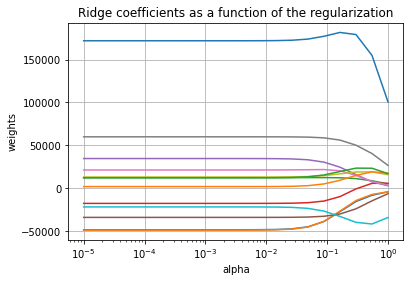

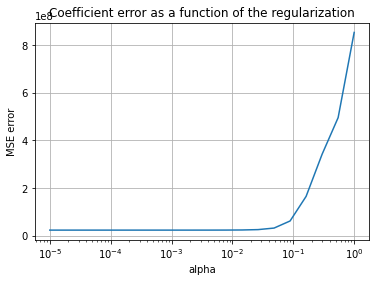

In [45]:
# ----------------------------------------------------------------------
#                PLOT ALPHAS TO SEE BEST RANGE OF VALUES
# ----------------------------------------------------------------------
#
# DESCRIPTION:
# Each color in the plot represents one different dimension of the coefficient 
# vector (weights), and this is displayed as a function of the regularization parameter (alpha).
#
# The dependent variable Y is set as a function of the input features: y = X*w + c. 
# The coefficient vector w cames from ridge.

# As alpha tends toward zero the coefficients found by Ridge regression stabilize towards the 
# vector w. For big alpha (strong regularisation (alpha)) the coefficients are smaller 
# (eventually converging at 0) leading to a simpler and biased solution. These dependencies can be 
# observed on the top plot.

# The bottom plot shows the mean squared error between the coefficients found by the model 
# (changing alpha) and the chosen vector w (using ridge with alpha=1). Less regularised models 
# retrieve the exact coefficients (error is equal to 0), stronger regularised models increase the error.

coefs = []
errors = []

# For each alpha value in the interval
for a in alphas:
    # Set alpha to evaluate
    regressor.set_params(alpha=a)
    # Fit using new alpha
    regressor.fit(X, y)
    # Append weights array generated
    coefs.append(regressor.coef_)
    # Append score value generated from MSE original weights and generated weights
    errors.append(mean_squared_error(regressor.coef_, w))
    
# Plot ridge coefficients as a function of the regularization
Plots.plotCoefficients(
    alphas,
    coefs,
    'log',
    'alpha',
    'weights',
    'Ridge coefficients as a function of the regularization'
    )

# Plot coefficient error as a function of the regularization
Plots.plotCoefficients(
    alphas,
    errors,
    'log',
    'alpha',
    'MSE error',
    'Coefficient error as a function of the regularization'
    )

As we can see in the *first plot*, considering the low alpha values, weights have a fixed value. By increasing alpha value towards zero, we can see that the weights start to assume a more variable value, decreasing it until they all reach a 0 value (we cannot see this last part because we cutted values to generate it, since we don't need them).

At same time, in the *second plot*, we can see that increasing the alpha value we have a bigger error (MSE in our case). Less regularised models retrieve the exact coefficients (error is equal to 0), stronger regularised models increase the error.

The Ridge Regression allows us to not only fit the data but also to keep weights of the model as small as possible.

### 5.1.2 Plotting Validation Curve
Now we explore the **validation curve**. It is used to evaluate our model based on hyperparameter _alpha_. To do that we can see the training scores and validation scores of Ridge for different values of the alpha parameter. 

We want the model to be complex enough to capture relevant information in the training data but not too complex to avoid *overfitting*.

![training-test-set](Images/ValidationCurves.png)

In [46]:
# ----------------------------------------------------------------------
#                PLOT VALIDATION CURVE USING MSE
# ----------------------------------------------------------------------
train_score, test_scores = validation_curve(
    regressor, x_train, y_train, 
    param_name="alpha", param_range=alphas,
    scoring='neg_mean_squared_error', n_jobs=-1)

Plots.plotValidationLearningCurve(
    alphas,                                         # x
    [train_score, test_scores],                     # y
    ['Training score', 'CV score (Test score)'],    # labels
    ['r', 'g'],                                     # colors
    True,                                           # negative
    'alpha',                                        # x plot label
    'MSE',                                          # y plot label
    'Validation curve - Ridge regression')          # title

# ----------------------------------------------------------------------
#                PLOT VALIDATION CURVE USING R2
# ----------------------------------------------------------------------
#train_score, test_scores = validation_curve(
#    regressor, x_train, y_train, 
#    param_name="alpha", param_range=alphas, 
#    scoring='r2', n_jobs=-1)
#
#Plots.plotValidationLearningCurve(
#    alphas,                                        # x
#    [train_score, test_scores],                    # y
#    ['Training score', 'CV score (Test score)'],   # labels
#    ['r', 'g'],                                    # colors
#    False,                                         # negative
#    'alpha',                                       # x plot label
#    'R2',                                          # y plot label
#    'Validation curve - Ridge regression')         # title

As we can see the curve decreases and increases in a small part on the left side of the graph. Here we can find the best alpha and it's value is really low (range 0-0.1).

## 5.2 Nested-cross validation

We can try to reach a better result using **Nested cross validation**. We make a comparison between nested and non-nested cross validation.

Mean difference: -0.002035 - Standard deviation of 0.000370.


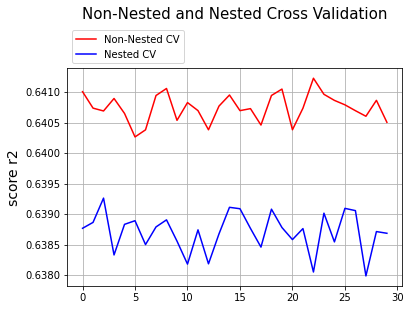

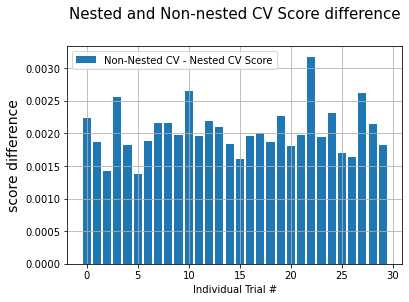

In [47]:
# Number of random trials
NUMBER_TRIALS = 30

# Arrays to store scores
non_nested_scores = np.zeros(NUMBER_TRIALS)
nested_scores = np.zeros(NUMBER_TRIALS)

# Loop for each trial
for i in range(NUMBER_TRIALS):
    # Cross-validation technique for the inner loop
    inner_loop_cv = KFold(n_splits=5, shuffle=True, random_state=i)
    # Cross-validation technique for the outer loop
    outer_loop_cv = KFold(n_splits=5, shuffle=True, random_state=i)

    # Non-nested CV alpha parameter search and scoring
    nncv = GridSearchCV(estimator=regressor, param_grid=parameters, cv=inner_loop_cv, n_jobs=-1)
    nncv.fit(X, y)
    non_nested_scores[i] = nncv.best_score_

    # Nested CV with alpha parameter optimization
    nested_score = cross_val_score(nncv, X=x_train, y=y_train, cv=outer_loop_cv, n_jobs=-1)
    nested_scores[i] = nested_score.mean()

# Determ score difference (non-nested - nested)
score_difference = non_nested_scores - nested_scores

print("Mean difference: {:6f} - Standard deviation of {:6f}."
      .format(-score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
Plots.plotNestedNonNestedCVScores(nested_scores, non_nested_scores)

# Plot bar chart of the difference between non-nested and nested cv scores
Plots.plotNestedNonNestedCVScoreDifference(NUMBER_TRIALS, score_difference)

As we can see we don't have a better score using nested cross validation.

### 5.2.1 Plot coefficients (highest and lowest coefficients)

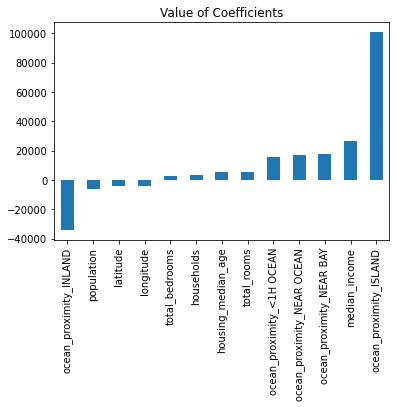

In [48]:
# Plot coefficients (highest and lowest coefficients)
Plots.plotValueOfCoefficients("Value of Coefficients", x_train, regressor)

Increasing the alpha value causes a decrease and an increase (`ocean_proximity_INLAND`, `ocean_proximity_ISLAND`) of coefficients value. Chosen the best alpha value, the plot above shows us the coefficients value obtained with it.

## 5.3 Plotting Learning Curve

We can use **Learning curve** to show how much the estimator benefits from more data and if the estimator is more sensitive to **error due to variance** vs. **error due to bias**.

If the training and cross-validation scores converge together as more data are added, then 
the model will probably not benefit from more data. 
Otherwise, if the training score is much greater than the validation score then the model probably requires more training 
examples in order to generalize more effectively.

![training-test-set](Images/LearningCurves_GoodFit.png)

We now look at the learning curve for training set values from  `start`  to  `end`, using an step size of `step_size` (new data to add).

In [49]:
# Start point
start = int(x_train.shape[0] * 0.01)
# End point
end = int(x_train.shape[0] * 0.8)
# Step size
step_size = int(x_train.shape[0] * 0.1)
# Create sequence of numbers from "start" to "end" with a step of "step_size"
sizes = range(start, end, step_size)

print(sizes)

range(133, 10694, 1336)


Actual alpha value: 0.0000330000


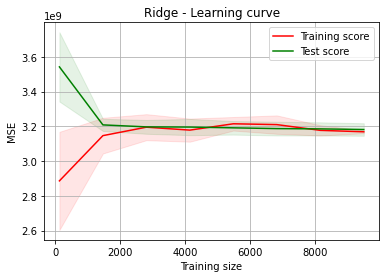

Cross-validated risk estimate: 3235725064.849


In [50]:
# Assign best alpha value calculated
#regressor.alpha = best_alpha

# Define the model/estimator
regressor = RidgeRegressionEstimator(alpha=0.000033)

# ----------------------------------------------------------------------
#                PLOT VALIDATION CURVE USING MSE
# ----------------------------------------------------------------------
print('Actual alpha value: {0:.10f}'.format(regressor.alpha))

train_size, train_score, test_scores = learning_curve(regressor, x_train, y_train, train_sizes=sizes, shuffle=True, random_state=540, scoring="neg_mean_squared_error", n_jobs=-1)

Plots.plotValidationLearningCurve(
    train_size,                                     # x
    [train_score, test_scores],                     # y
    ['Training score', 'Test score'],               # labels
    ['r', 'g'],                                     # colors
    True,                                           # negative
    'Training size',                                # x plot label
    'MSE',                                          # y plot label
    'Ridge - Learning curve')                       # title

print("Cross-validated risk estimate: {0:.3f}".format(-test_scores.mean()))


# ----------------------------------------------------------------------
#                PLOT VALIDATION CURVE USING R2
# ----------------------------------------------------------------------
#print('Alpha attuale', regressor.alpha)
#train_size, train_score, test_scores = learning_curve(regressor, x_train, y_train, train_sizes=sizes, shuffle=True, random_state=540, scoring="r2", n_jobs=-1)
#
#Plots.plotValidationLearningCurve(
#    train_size,                                     # x
#    [train_score, test_scores],                     # y
#    ['Training score', 'Test score'],               # labels
#    ['r', 'g'],                                     # colors
#    True,                                           # negative
#    'Training size',                                # x plot label
#    'R2',                                           # y plot label
#    'Ridge - Learning curve')                       # title
#
#print("Cross-validated risk estimate: {0:.3f}".format(test_scores.mean()))

As we can see starting from 8000 we reach a stable convergence and so, adding more data are added the model will probably not benefit from it.

# 6 PCA
To identify correlations and patterns in a dataset and transform it into a dataset of significantly lower dimension without loss of any important information we can use a dimensionality reduction technique **Principal components analysis (PCA)**.

The main idea behind PCA is to figure out patterns and correlations among various features in the data set calculating a covariance matrix, obtain the eigenvectors and eigenvalues from it and use them to calculate the principal components of the data set. The final step will be reduce the dimensions of the dataset.

## 6.1 Apply scaler to data
As first step we need to scale data. In Principal Component Analysis usually is prefered Standardization over Normalization (since we are interested in the components that maximize the variance). We already standardized data above so we don't need to do nothing more about it.

## Function to split the data, generate learning curve and plot it

In [51]:
# Function to split the data, generate learning curve and plot it
def generate_learning_curve(X, Y, is_pca):
    # Split train and test
    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, shuffle=True, random_state=540)

    print('Train size:', x_train.shape[0])
    print('Test size:', x_test.shape[0])

    # Setup intervals for the plot
    min_ts = int(x_train.shape[0] * 0.01)
    max_ts = int(x_train.shape[0] * 0.8)
    step_ts = int(x_train.shape[0] * 0.1)
    sizes = range(min_ts, max_ts, step_ts)

    # Calculate learning curve
    train_size, train_score, test_scores = learning_curve(regressor, x_train, y_train, train_sizes=sizes, cv=5,
                                                          scoring='neg_mean_squared_error', shuffle=True, random_state=540,
                                                          n_jobs=-1)
    
    # Setup plot name
    plot_name = "Learning curve"
    final_part = ""
    if is_pca==True:
        final_part = " - PCA"
    else:
        final_part = " - no PCA"
    # Final plot name
    plot_name = plot_name+final_part

    # Show plot of learning curve
    Plots.plotValidationLearningCurve(
        train_size,                                 # x
        [train_score, test_scores],                 # y
        ['Training', 'Test'],                       # labels
        ['r', 'g'],                                 # colors
        True,                                       # negative
        'Training size',                            # x plot label
        'Mean Squared loss',                        # y plot label
        plot_name)                                  # title

## 6.2 Generete Learning Curve (no PCA)

We first generate learning curve without any reduction. We use scaled data and the best alpha calculated before.

Train size: 13368
Test size: 3343


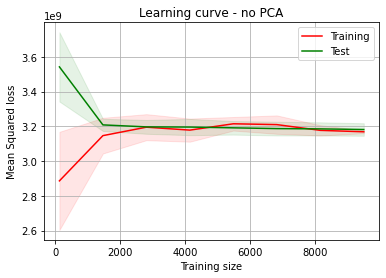

In [52]:
# True = generate all next learning curves
generate_learning_cur = True

if generate_learning_cur==True:
    # Generate learning curve
    generate_learning_curve(X, y, False)

## 6.3 Find number of components to reduce (in PCA)

In [53]:
# Apply PCA (dimensionality reduction)
pca = PCA()
pca.fit(X)
#X_pcaAll_standardized = pca.transform(X_scaled)

PCA()

### 6.3.1 Plot variance associated with each principal component
To get informations about the variance of the data with respect to a varied number of principal components we'll do some plots. We'll use them to check the number of components to use and to cut off.

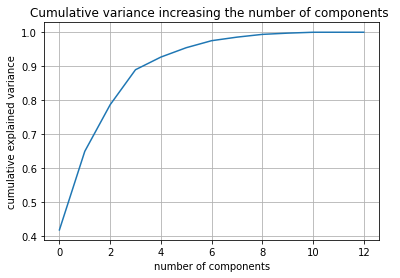

In [54]:
# Plot cumulative variance
Plots.plotCumulativeVariance(pca)

We can identify more accurately the number of components that we can remove with a plot that shows the cut-off threshold.

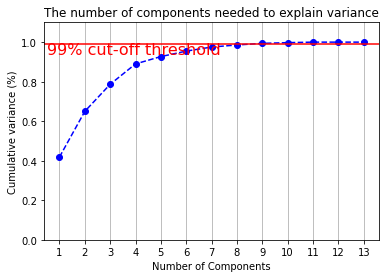

In [55]:
# Plot cumulative variance and a percentage of where we can "cut"
Plots.plotCutOffThreshold(pca)

Typically the explained variance should be between 95–99%. In order not to go too tight, we choose **99%**. 

The plot indicates that the first 9 principal components contain the 99% of information (variance) within the data. So we can try to pass from 13 features to just 9, thus we can perform later an analysis on the data, since the redundant or insignificant variables are out.

So now we test PCA with 9 components and we check out if this reduction gives us best results.

## 6.4 Apply PCA (9 components)

In [56]:
#pca7 = PCA(0.95) # 95% of variance
pca9 = PCA(0.99) # 99% of variance
#pca8 = PCA(n_components=8)

print("Total number of components:", pca.n_components_)

# Fit scaled data
pca9.fit(X)

# Apply transform to scaled data
X_pca9_minimized = pca9.transform(X)

# Print new dataset size
print('\nNew Dataset size after transformations: ', X_pca9_minimized.shape)
# Print variation of each Principal Component
print('\nExplained variation per principal component: {}'.format(pca9.explained_variance_ratio_))

Total number of components: 13

New Dataset size after transformations:  (16711, 9)

Explained variation per principal component: [0.41826041 0.23124554 0.13713291 0.10311204 0.03717553 0.02757924
 0.02062847 0.01046258 0.00813553]


As we can see the first four component has almost half of total variance (41%, 23%, 13%, 10% (tot=87%) respectively). All other components have a small amount of variance.

## 6.5 Comparing performance (with and without PCA)

In [57]:
# Test model on specific data
def test_model(regressor, X, Y):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, shuffle=True, random_state=540)
    print("Dataset Size : ", sys.getsizeof(X), "bytes, Shape : ", x_train.shape, x_test.shape, y_train.shape,
          y_test.shape)
    regressor.fit(x_train, y_train)
    print('Train Accuracy : %.2f, Test Accuracy : %.2f' % (
        regressor.score(x_train, y_train), regressor.score(x_test, y_test)))

# Compare results no PCA and PCA
def compare_accuracy(regressor):
    print("Performance without PCA :")
    test_model(regressor, X, y)

    print("\nPerformance with PCA(8 components) :")
    test_model(regressor, X_pca9_minimized, y)

# Compare accuracy of various techniques (no PCA and PCA)
compare_accuracy(regressor)

Performance without PCA :
Dataset Size :  1286763 bytes, Shape :  (13368, 13) (3343, 13) (13368,) (3343,)
Train Accuracy : 0.64, Test Accuracy : 0.65

Performance with PCA(8 components) :
Dataset Size :  1203304 bytes, Shape :  (13368, 9) (3343, 9) (13368,) (3343,)
Train Accuracy : 0.63, Test Accuracy : 0.64


As we can see we preserve the accuracy, passing from 0.65 to 0.64 and 0.65 to 0.64. So we can definitely say that it gives us good results.

## 6.6 Generete Learning Curve (PCA)

Train size: 13368
Test size: 3343


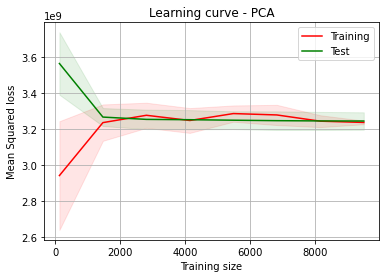

In [58]:
if generate_learning_cur:
    # Generate learning curve
    generate_learning_curve(X_pca9_minimized, y, True)

As we can see the learning curve is almost the same. The score decreases only a little bit amd there is only a small increment of the variance. So, is a good idea to use PCA in our case.